In [1]:
%matplotlib inline # notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것이다.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [6]:
import random

rd = random.randrange(1, len(digits))
print(digits.images[rd])

[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]


In [7]:
print(digits.target[rd])
# 오 약간 3같기도 하고.

3


In [8]:
print('전체 샘플의 개수 : {}'.format(len(digits.images)))

전체 샘플의 개수 : 1797


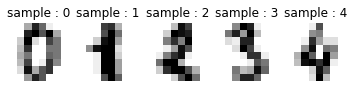

In [9]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample : {}'.format(label))

In [11]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [12]:
X = digits.data # 이미지, 즉 특성 행렬
Y = digits.target # 레이블아시죠? 고거.

In [13]:
import torch
import torch.nn as nn
from torch import optim

In [14]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)
        

In [15]:
loss_func = nn.CrossEntropyLoss()

In [16]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [17]:
optimizer = optim.Adam(model.parameters())

In [18]:
losses = []

In [19]:
type(losses)

list

In [21]:
for epochs in range(200):
    optimizer.zero_grad()
    
    pred = model(X)
    loss = loss_func(pred, Y)
    loss.backward()
    optimizer.step()
    
    if epochs % 10 == 0:
        print('Epochs {:4d}/{} Cost: {:6f}'.format(epochs, 200, loss.item()))
        
    losses.append(loss.item())

Epochs    0/200 Cost: 0.064278
Epochs   10/200 Cost: 0.058169
Epochs   20/200 Cost: 0.052824
Epochs   30/200 Cost: 0.048111
Epochs   40/200 Cost: 0.043925
Epochs   50/200 Cost: 0.040217
Epochs   60/200 Cost: 0.036929
Epochs   70/200 Cost: 0.034027
Epochs   80/200 Cost: 0.031440
Epochs   90/200 Cost: 0.029127
Epochs  100/200 Cost: 0.027019
Epochs  110/200 Cost: 0.025097
Epochs  120/200 Cost: 0.023341
Epochs  130/200 Cost: 0.021729
Epochs  140/200 Cost: 0.020254
Epochs  150/200 Cost: 0.018904
Epochs  160/200 Cost: 0.017658
Epochs  170/200 Cost: 0.016510
Epochs  180/200 Cost: 0.015449
Epochs  190/200 Cost: 0.014472


Text(0.5, 1.0, 'lose~~')

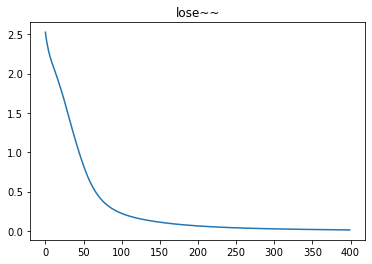

In [23]:
plt.plot(losses)
plt.title("lose~~")